<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_B_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 17.4: Lagrange Polynomial Method

In the previous two sections we observed linear interpolation and cubic spline interpolation. One of the drawbacks of this method is that it means that the interpolating function is a collection of piecewise functions. The next two methods that we will observe instead only use a single polynimial function for the interpolation.

The Lagrange polynomial method works by writing the interploation function, which we notate as $L(x)$ as a combonation of Lagrange basis polynomials
$$P_i(x)=\Pi^{n}_{j=1,j\neq i}\frac{x-x_j}{x_i-x_j},$$
such that
$$L(x)=\sum_{i=1}^ny_iP_i(x),$$
where $L(x_i)=y_i$.

The following code takes a collection of data points and then plots the collection of Lagrange basis polynomials that make up the interpolating function. In this code note that we include the coefficient infront of the polynomials $y_i$ to better show how the polynomials intersect these points



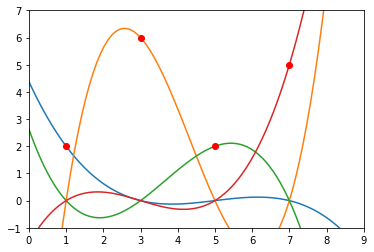

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,3,5,7]
y=[2,6,2,5]

x_bounds = np.linspace(0,10,100)

label = []
for i in range(len(x)):
  label.append(f"$P_{i}$")

  P = np.ones_like(x_bounds)
  for j in range(len(x)):
    if j != i:
      P = P*(x_bounds-x[j])/(x[i]-x[j])
  P = P*y[i] #Includes y_i infront
  plt.plot(x_bounds,P)

plt.ylim(-1,7)
plt.xlim(0,9)
plt.plot(x,y,'ro')

Note that all of the basis polynomials have a root when $i\neq j$. This leads to the property that we want as when we evaluate our interpolating function at one of the data points, we get
  $$L(x_i) = y_1P_1(x_i)+...+y_iP_i(x_i)+...y_nP_n(x_i)= 0+...+y_i+...+0=y_i.$$
Now, by summing the basis polynomials with their coefficients, we get

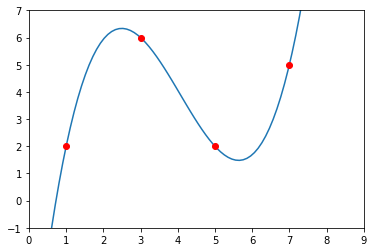

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,3,5,7]
y=[2,6,2,5]

x_bounds = np.linspace(0,10,100)
L = np.zeros_like(x_bounds)
label = []
for i in range(len(x)):
  label.append(f"$P_{i}$")

  P = np.ones_like(x_bounds)
  for j in range(len(x)):
    if j != i:
      P = P*(x_bounds-x[j])/(x[i]-x[j])
  P = P*y[i] #Includes y_i infront
  L += P

plt.ylim(-1,7)
plt.xlim(0,9)
plt.plot(x_bounds,L)
plt.plot(x,y,'ro')

Note that unlike the previous two methods, the function extends outside of the data points. The function outside the region of the data is invalid, however, as this would be extrapolation and would require greater knowledge of the source of the data, while our interpolating function only factors in the behaviour of the points in the region. 

There is also a built in Lagrange polynomial interpolator in SciPy which functions similarly to the previous interpolating functions

##Section 17.5: Newton's Polynomial Interpolation

Like Lagrange polynomial interpolation, Newton polynomial interpolation works by creating one polynomial that describes the entier set of data. The interpolating polynomial $f(x)$ takes the form
$$f(x)=\sum_{i=0}^na_in_i(x),$$
where
$$n_i(x)=\Pi_{j=0}^{i-1}(x-x_j).$$

For this, we just need to find the coefficients $a_i$. This comes down to divided differences, which are described as
$$a_0=y_0$$
  $$a_1=f[x_1,x_0]=\frac{y_1-y_0}{x_1-x_0}$$
  $$a_2=f[x_2,x_1,x_0]=\frac{f[x_2,x_1]-f[x_1,x_0]}{x_2-x_1}$$
  $$...$$
  $$a_k=f[x_k,x_{k-1},...,x_1,x_0]=\frac{f[x_k,x_{k-1},...,x_2,x_1]-f[x_{k-1},x_{k-2},...,x_1,x_0]}{x_k-x_0}$$.

  Below, we see a implementation of the Newton polynomial method

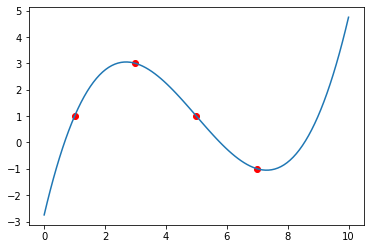

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def div_dif(x,y):
  if len(x) <= 2:
    return (y[1]-y[0])/(x[1]-x[0])
  return (div_dif(x[1:],y[1:])-div_dif(x[:-1],y[:-1]))/(x[-1]-x[0])

x = [1,3,5,7]
y= [1,3,1,-1]

x_bounds = np.linspace(0,10,100)

a = y[0]
Newton_Poly = a*np.ones_like(x_bounds)
for i in range(1,len(x)):
  term = 1
  for j in range(i):
    term *= x_bounds-x[j]
  term *= div_dif(x[:i+1],y[:i+1])
  Newton_Poly += term
  

plt.plot(x,y,'ro')
plt.plot(x_bounds,Newton_Poly)

As a final viewing of interpolation functions, I will plot the results of the four that we have observed so far and how they work on the same set of data

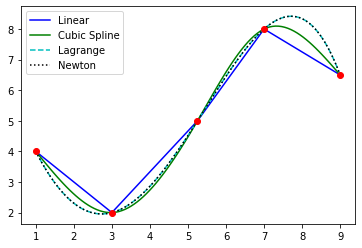

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

x = [1,3,5.25,7,9]
y = [4,2,5,8,6.5]
x_bounds = np.linspace(1,9,100)


#Linear
plt.plot(x,y,'-b',label = 'Linear')

#Cubic Spline
f = CubicSpline(x,y,bc_type='natural')
y_new = f(x_bounds)
plt.plot(x_bounds,y_new,'-g',label = 'Cubic Spline')

#Lagrange Polynomial
L = np.zeros_like(x_bounds)
for i in range(len(x)):
  P = np.ones_like(x_bounds)
  for j in range(len(x)):
    if j != i:
      P = P*(x_bounds-x[j])/(x[i]-x[j])
  P = P*y[i] #Includes y_i infront
  L += P
plt.plot(x_bounds,L,'c--',label = "Lagrange")

#Newton Polynomial
def div_dif(x,y):
  if len(x) <= 2:
    return (y[1]-y[0])/(x[1]-x[0])
  return (div_dif(x[1:],y[1:])-div_dif(x[:-1],y[:-1]))/(x[-1]-x[0])

a = y[0]
Newton_Poly = a*np.ones_like(x_bounds)
for i in range(1,len(x)):
  term = 1
  for j in range(i):
    term *= x_bounds-x[j]
  term *= div_dif(x[:i+1],y[:i+1])
  Newton_Poly += term
plt.plot(x_bounds,Newton_Poly,'k:',label = "Newton")

plt.plot(x,y,'ro')

plt.legend()